# IMPORTS

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from scipy.interpolate import make_interp_spline

import seaborn as sns

# Preparação dos Dados

## Carregamento do Dataset

In [135]:
df = pd.read_csv("glioma.csv")

In [136]:
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

## Dicionário de Variáveis


| Variable Name | Role   | Type        | Demographic | Description                                                                                                         | Units | Missing Values |
|---------------|--------|-------------|-------------|---------------------------------------------------------------------------------------------------------------------|-------|----------------|
| Grade         | Target | Categorical |             | Glioma grade class information (0 = "LGG"; 1 = "GBM")                                                              | N/A   | no             |
| Gender        | Feature| Categorical | Gender      | Gender (0 = "male"; 1 = "female")                                                                                   | N/A   | no             |
| Age_at_diagnosis | Feature | Continuous  | Age         | Age at diagnosis with the calculated number of days                                                                 | years | no             |
| Race          | Feature| Categorical |             | Race (0 = "white"; 1 = "black or african American"; 2 = "asian"; 3 = "american indian or alaska native")           | N/A   | no             |
| IDH1          | Feature| Categorical |             | isocitrate dehydrogenase (NADP(+))1 (0 = NOT_MUTATED; 1 = MUTATED)                                                  | N/A   | no             |
| TP53          | Feature| Categorical |             | tumor protein p53 (0 = NOT_MUTATED; 1 = MUTATED)                                                                    | N/A   | no             |
| ATRX          | Feature| Categorical |             | ATRX chromatin remodeler (0 = NOT_MUTATED; 1 = MUTATED)                                                             | N/A   | no             |
| PTEN          | Feature| Categorical |             | phosphatase and tensin homolog (0 = NOT_MUTATED; 1 = MUTATED)                                                       | N/A   | no             |
| EGFR          | Feature| Categorical |             | epidermal growth factor receptor (0 = NOT_MUTATED; 1 = MUTATED)                                                     | N/A   | no             |
| CIC           | Feature| Categorical |             | capicua transcriptional repressor (0 = NOT_MUTATED; 1 = MUTATED)                                                    | N/A   | no             |
| MUC16         | Feature| Categorical |             | mucin 16, cell surface associated (0 = NOT_MUTATED; 1 = MUTATED)                                                    | N/A   | no             |
| PIK3CA        | Feature| Categorical |             | phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha (0 = NOT_MUTATED; 1 = MUTATED)               | N/A   | no             |
| NF1           | Feature| Categorical |             | neurofibromin 1 (0 = NOT_MUTATED; 1 = MUTATED)                                                                     | N/A   | no             |
| PIK3R1        | Feature| Categorical |             | phosphoinositide-3-kinase regulatory subunit 1 (0 = NOT_MUTATED; 1 = MUTATED)                                       | N/A   | no             |
| FUBP1         | Feature| Categorical |             | far upstream element binding protein 1 (0 = NOT_MUTATED; 1 = MUTATED)                                               | N/A   | no             |
| RB1           | Feature| Categorical |             | RB transcriptional corepressor 1 (0 = NOT_MUTATED; 1 = MUTATED)                                                     | N/A   | no             |
| NOTCH1        | Feature| Categorical |             | notch receptor 1 (0 = NOT_MUTATED; 1 = MUTATED)                                                                    | N/A   | no             |
| BCOR          | Feature| Categorical |             | BCL6 corepressor (0 = NOT_MUTATED; 1 = MUTATED)                                                                    | N/A   | no             |
| CSMD3         | Feature| Categorical |             | CUB and Sushi multiple domains 3 (0 = NOT_MUTATED; 1 = MUTATED)                                                     | N/A   | no             |
| SMARCA4       | Feature| Categorical |             | SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily a, member 4 (0 = NOT_MUTATED; 1 = MUTATED) | N/A   | no             |
| GRIN2A        | Feature| Categorical |             | glutamate ionotropic receptor NMDA type subunit 2A (0 = NOT_MUTATED; 1 = MUTATED)                                    | N/A   | no             |
| IDH2          | Feature| Categorical |             | isocitrate dehydrogenase (NADP(+)) 2 (0 = NOT_MUTATED; 1 = MUTATED)                                                  | N/A   | no             |
| FAT4          | Feature| Categorical |             | FAT atypical cadherin 4 (0 = NOT_MUTATED; 1 = MUTATED)                                                              | N/A   | no             |
| PDGFRA        | Feature| Categorical |             | platelet-derived growth factor receptor alpha (0 = NOT_MUTATED; 1 = MUTATED)                                        | N/A   | no             |

# Pré-processamento dos Dados

## Tratamento de Valores Ausentes

In [138]:
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

Nenhum valor ausente foi encontrado na base de dados.

## Normalização e Padronização

In [139]:
scaler = MinMaxScaler()

cols_to_normalize = ['Age_at_diagnosis']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

## Renomear colunas

In [140]:
# renomear label
df.rename(columns={'Grade':'Glioma'}, inplace=True)

# Análise Exploratória (EDA)

## Distribuição das Variáveis

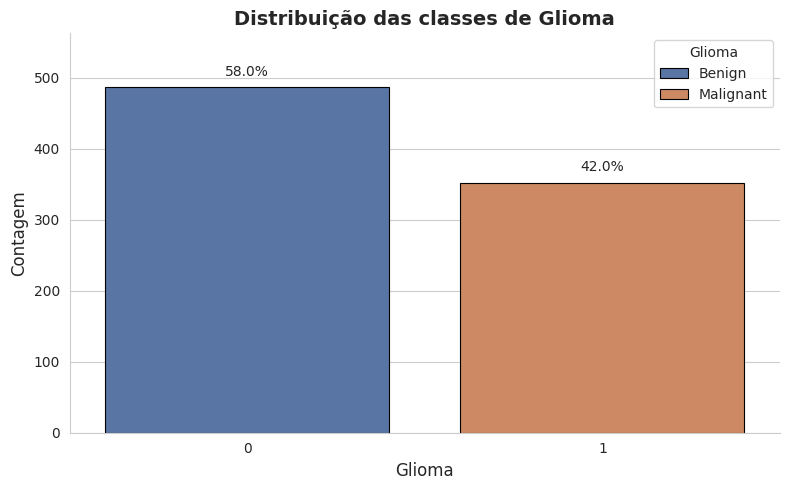

In [141]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='Glioma', data=df, hue='Glioma',
    palette=['#4c72b0', '#dd8452'],
    edgecolor='k', linewidth=0.8
)

# labels and title
ax.set_title('Distribuição das classes de Glioma', fontsize=14, fontweight='bold')
ax.set_xlabel('Glioma', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12)

# ajustar limite y para espaço para anotações
ylim = ax.get_ylim()
ax.set_ylim(0, ylim[1] * 1.10)

# anotar contagens e percentuais em cada barra (ignora barras com altura 0)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height <= 0:
        continue
    pct = 100 * height / total
    ax.annotate(f'{pct:.1f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, fontweight='medium',
                xytext=(0,6), textcoords='offset points')

sns.despine(left=False, bottom=False)
plt.legend(title='Glioma', labels=['Benign', 'Malignant'])
plt.tight_layout()
plt.show()

## Correlação Entre Variáveis

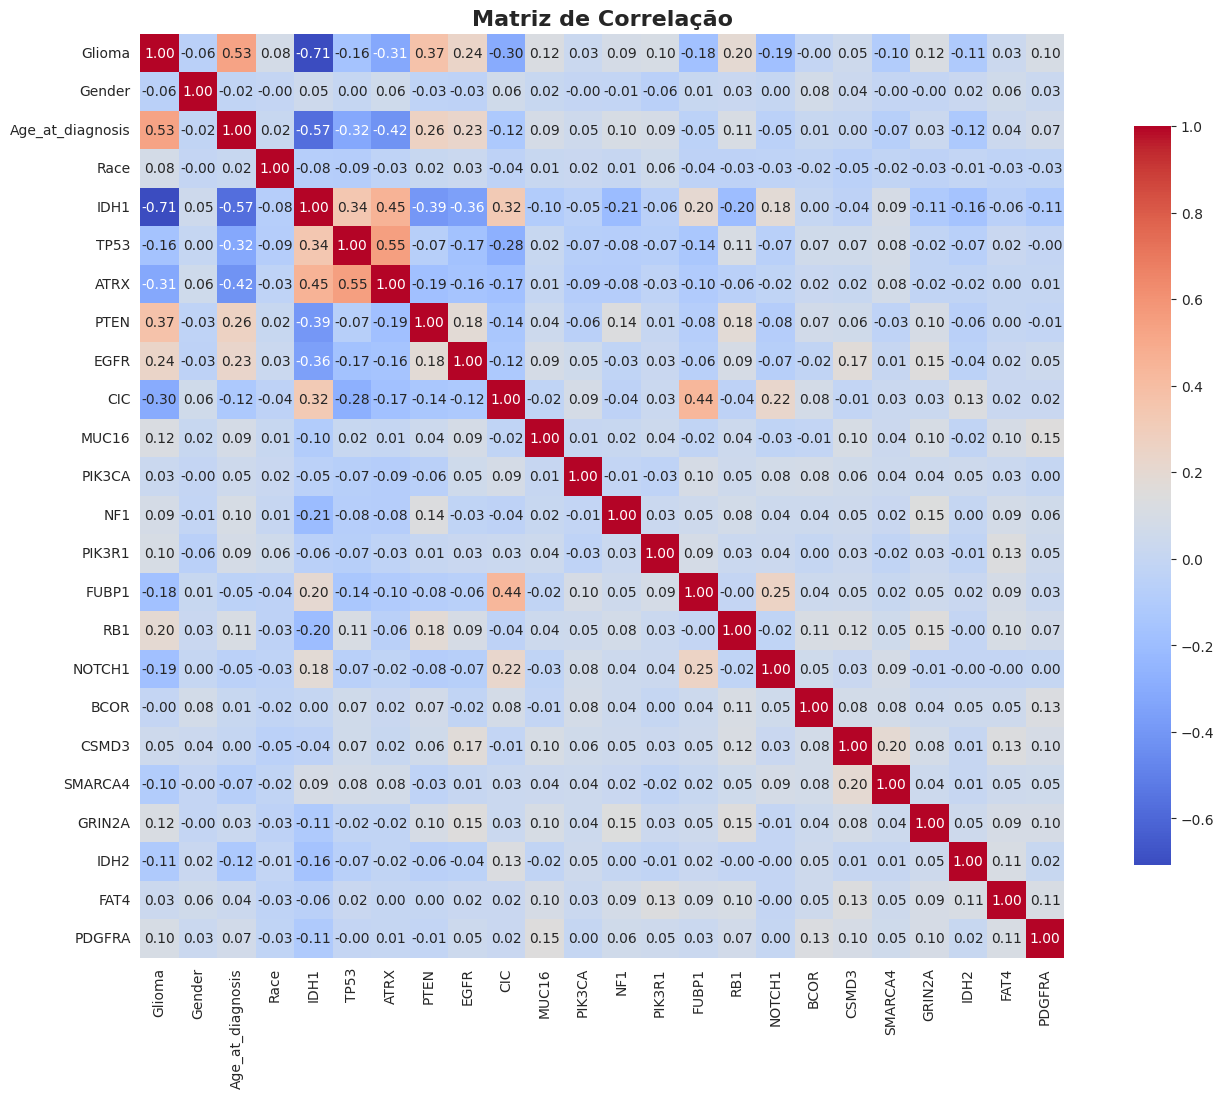

In [142]:
plt.figure(figsize=(18,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação', fontsize=16, fontweight='bold')
plt.show()

### Melhores Correlações Com 'Diabetes'

In [143]:
correlation_with_target = correlation_matrix['Glioma'].sort_values(ascending=False)
# Features mais correlacionadas com a variável alvo
selected_features = correlation_with_target.index[1:9]
correlation_with_target[1:9] 

Age_at_diagnosis    0.529203
PTEN                0.367174
EGFR                0.241527
RB1                 0.195168
MUC16               0.119447
GRIN2A              0.118685
PDGFRA              0.102327
PIK3R1              0.101813
Name: Glioma, dtype: float64

# Modelagem

## Divisão Treino/Teste

### Separação (X) e (y)

In [144]:
X = df.drop('Glioma', axis=1)
y = df['Glioma']

### Split dos Dados em Treino e Teste

In [172]:

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

In [173]:
print("Shapes")
print(f"Train -> {X_train.shape}")
print(f"Val   -> {X_val.shape}")
print(f"Test  -> {X_test.shape}")

Shapes
Train -> (503, 23)
Val   -> (168, 23)
Test  -> (168, 23)


## Seleção de Features

In [146]:
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

## Treinamento do Modelo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_first_pred = knn.predict(X_val)

# Avaliação dos Modelos

## Curva ROC e AUC

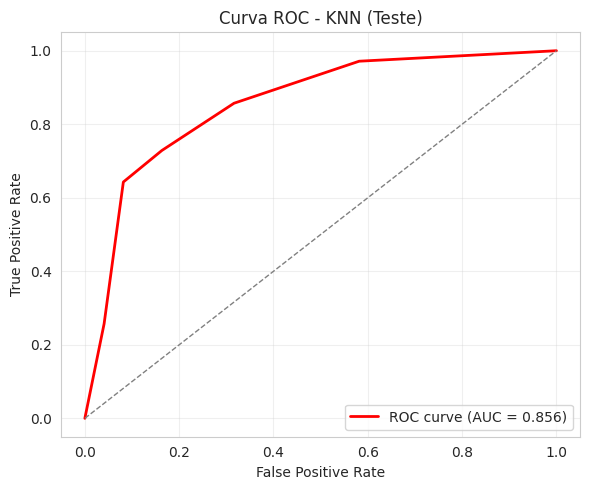

In [161]:
# Curva ROC original (test set)
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - KNN (Teste)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Matriz de Confusão

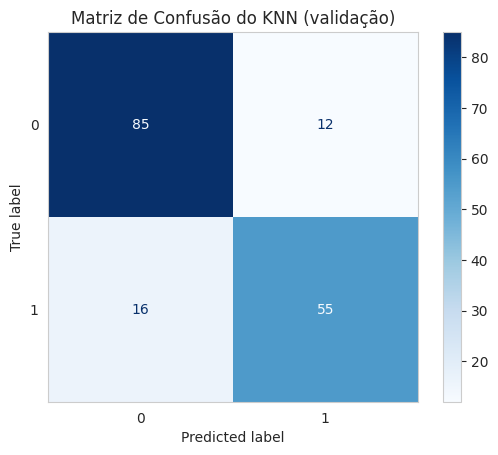

In [167]:
# Confusion matrix for baseline k=5 on validation set
cm = confusion_matrix(y_val, y_first_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do KNN (validação)')
plt.grid(False)
plt.show()

## Métricas: Acuracia, Precision, Recall e f1-score

In [176]:
# Test metrics for best_k
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia (teste): {accuracy:.4f}')
print(f'Precisão (teste): {precision:.4f}')
print(f'Recall   (teste): {recall:6.4f}')
print(f'F1-Score (teste): {f1:.4f}')

accuracy_val = accuracy_score(y_val, y_first_pred)
precision_val = precision_score(y_val, y_first_pred)
recall_val = recall_score(y_val, y_first_pred)
f1_val = f1_score(y_val, y_first_pred)

print(f'Acurácia (validação): {accuracy_val:.4f}')
print(f'Precisão (validação): {precision_val:.4f}')
print(f'Recall   (validação): {recall_val:.4f}')
print(f'F1-Score (validação): {f1_val:.4f}')

Acurácia (teste): 0.7917
Precisão (teste): 0.7612
Recall   (teste): 0.7286
F1-Score (teste): 0.7445
Acurácia (validação): 0.8333
Precisão (validação): 0.8209
Recall   (validação): 0.7746
F1-Score (validação): 0.7971


## Distribuição das Features por Classe

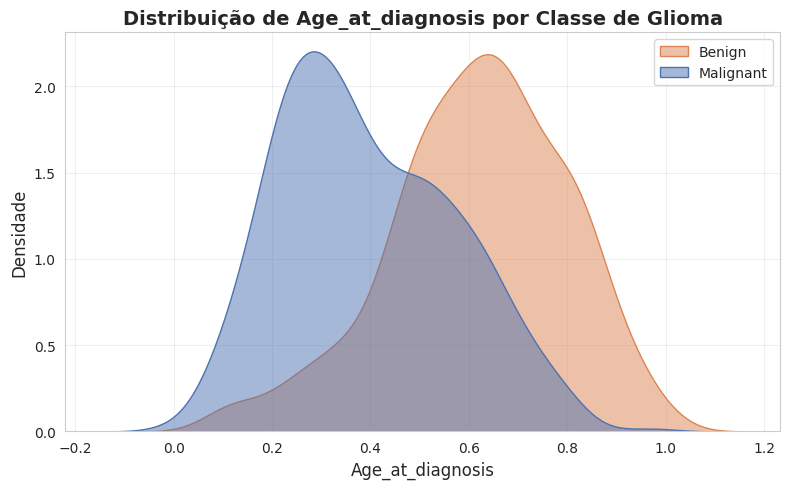

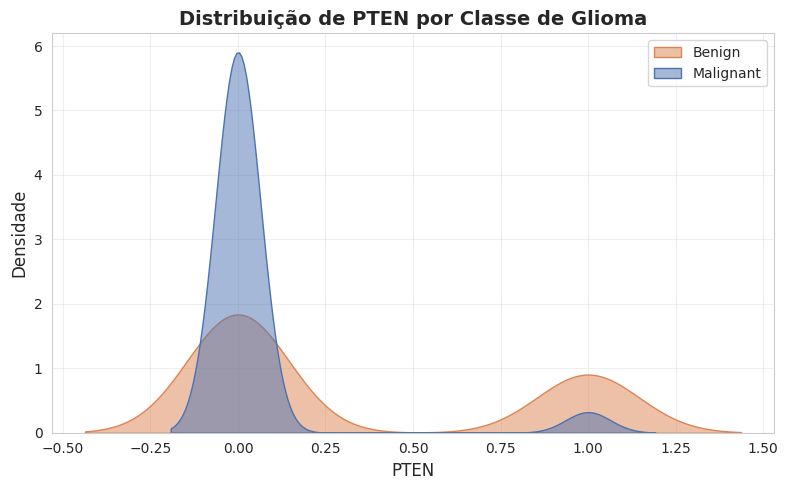

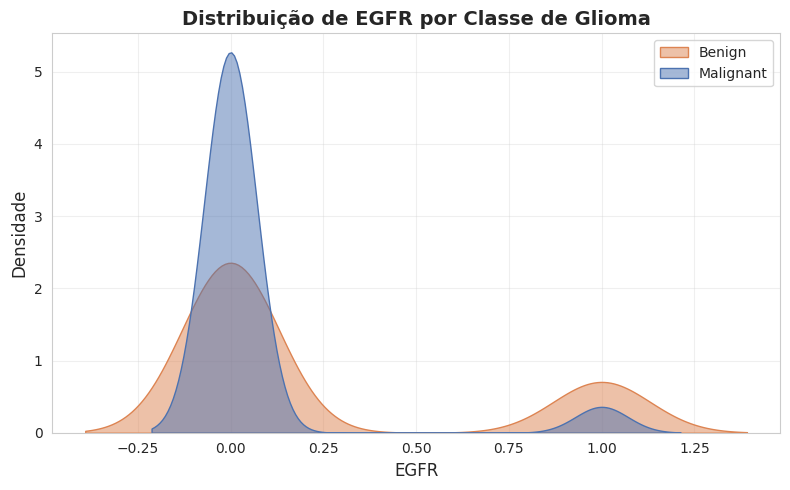

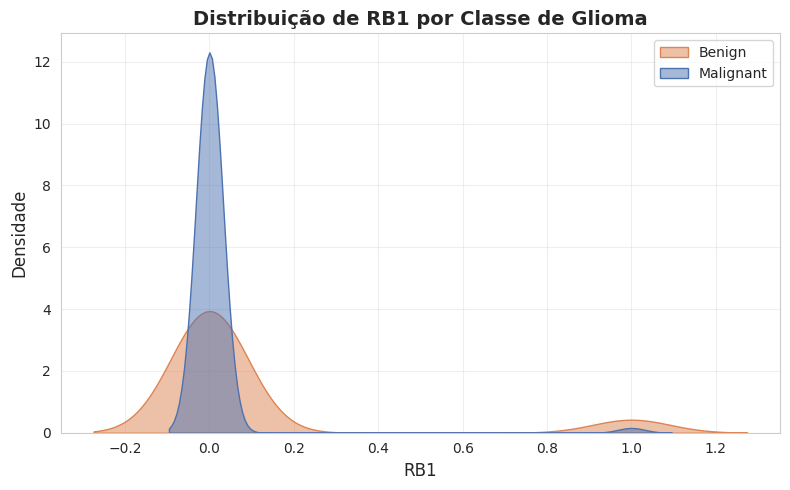

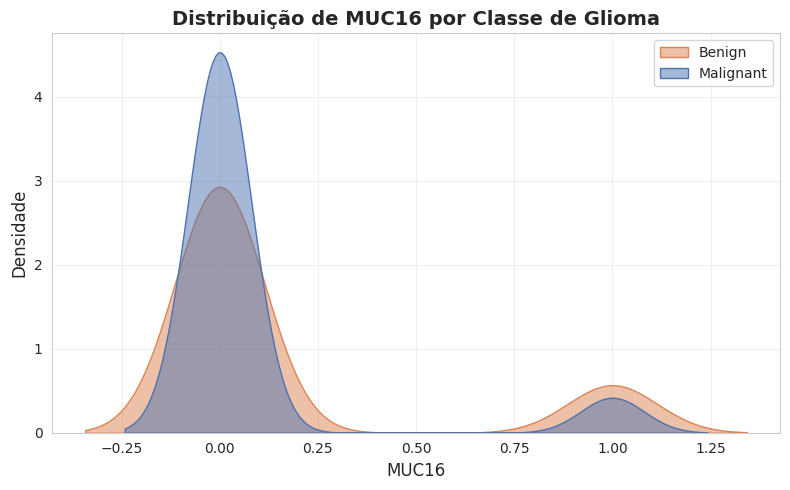

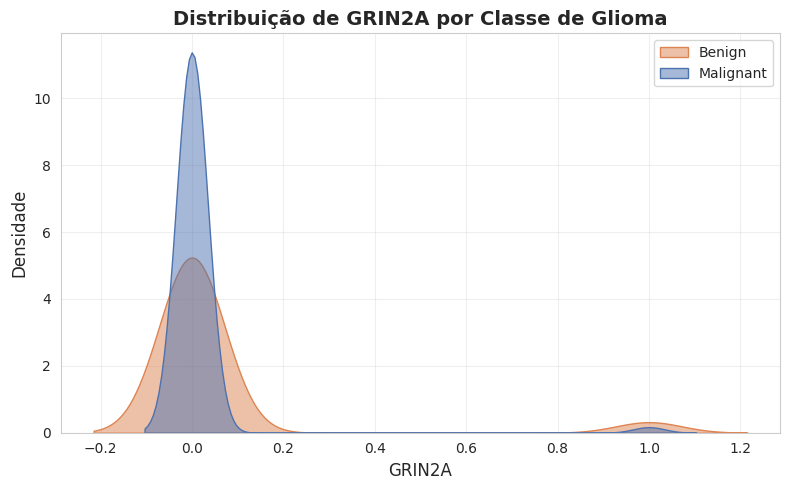

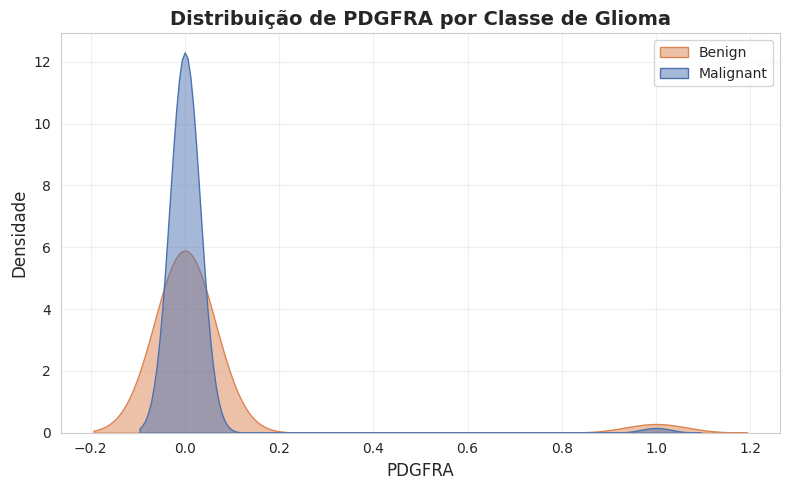

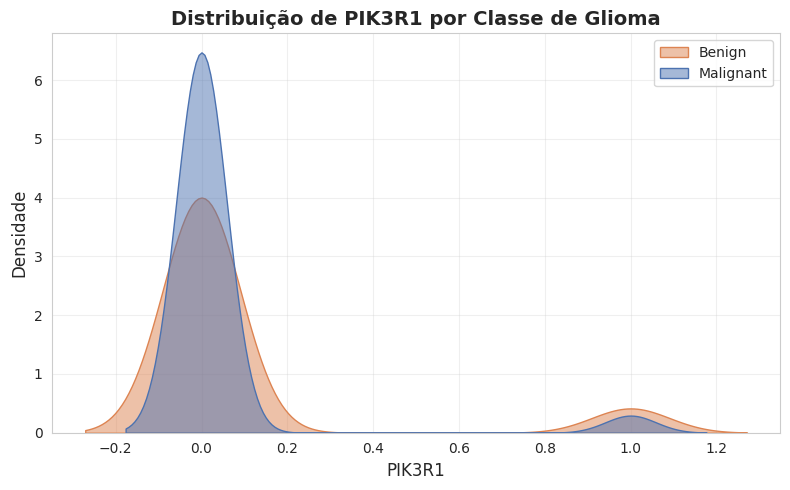

In [151]:
# distribuição das features por classe > 25%
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=feature, hue='Glioma', fill=True, legend=False, common_norm=False,
                palette=['#4c72b0', '#dd8452'], alpha=0.5)
    plt.title(f'Distribuição de {feature} por Classe de Glioma', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Densidade', fontsize=12)
    plt.legend(title='', labels=['Benign', 'Malignant'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()